# Private-Key Encryption

A **private-key encryption scheme** is defined by a **message space** $M$ and algorithms $\text{Gen}$, $\text{Enc}$ and $\text{Dec}$:

* $\text{Gen}$ (key generation algorithm): generates **key** $k$

* $\text{Enc}$ (encryption algorithm): takes key $k$ and **message** $m \in M$ as input; outputs **ciphertexst** $c$

$$c \gets \text{Enc}_k (m)$$

* $\text{Dec}$ (decryption algorithm): takes key $k$ and ciphertext $c$ as input; outputs message $m$ or "error"

$$m := \text{Dec}_k (c)$$

with

$$\text{Dec}_k(\text{Enc}_k(m)) = m$$

#### Note on the Notation

* The **left arrow** $\gets$ notation denotes assignment to the output of an algorithm that might be **randomized**. Meaning that the output of the algorithm may be different, even when run twice on the same set of inputs.

* The **colon equals** $:=$ denotes an assignment to the output of a **deterministic** algorithm. 

* A single **equal sign** $=$ denotes mathematical equality in contrast to an assignment.

## Shift Cipher

The Shift Cipher, a.k.a. Caesar Cipher, is defined as

* $M = \{\text{strings over lowercase English alphabet}\}$

* $Gen$: choose uniform $k \in \{0, \ldots, 25\}$

* $Enc_k(m_1 \ldots m_t)$: output $c_1 \ldots c_t$ where $c_i := m_i + k \pmod{26}$

* $Dec_k(c_1 \ldots c_t)$: output $m_1 \ldots m_t$ where $m_i := c_i - k \pmod{26}$

The **Shift Cipher** is **not secure** as it has only 26 possible keys, i.e. the **key space** has a size of $26$.

Given a ciphertext, try decrypting with every possible key. If ciphertext is long enough, only one possibility will "make sense".

In [40]:
class ShiftCipher:
    '''
    helloworld
    cccccccccc
    ----------
    jgnnqyqtnf
    '''
    
    alphas = "abcdefghijklmnopqrstuvwxyz"

    def __init__(self, key):
        self.key = key

    def enc(self, text):
        ciphertext = ""
        for m in text:
            c = self.alphas[(self.alphas.find(m) + self.alphas.find(self.key)) % len(self.alphas)]
            ciphertext += c if m in self.alphas else m
        return ciphertext

    def dec(self, ciphertext):
        text = ""
        for c in ciphertext:
            m = self.alphas[(self.alphas.find(c) - self.alphas.find(self.key)) % len(self.alphas)]
            text += m if c in self.alphas else c
        return text

In [41]:
cipher = ShiftCipher('c')
cipher.enc('helloworld')

'jgnnqyqtnf'

In [42]:
cipher.dec(cipher.enc('helloworld'))

'helloworld'

## Vigenère Cipher

In the Vigenère cypher, the key is a string rather than just a single character:

* $M = \{\text{strings over lowercase English alphabet}\}$

* $Gen$: string $k \in \{k_1, \ldots, k_u\}$ with $k_i \in M$ and length $u$. String is wraped around if $u < t$

* $Enc_k(m_1 \ldots m_t)$: output $c_1 \ldots c_t$ where $c_i := m_i + k_i \pmod{26}$

* $Dec_k(c_1 \ldots c_t)$: output $m_1 \ldots m_t$ where $m_i := c_i - k_i \pmod{26}$

The size of the **key space** is ${26}^u$, e.g. if a key has a size $u = 14$, then the key space has a size of ${26}^{14} \approx 2^{66}$ which makes a brute-force search expersive or impossilble.

The **Vigenère Cipher** is not secure though, as there are other attack vectors.

In [43]:
class VigenereCipher:
    '''
    tellhimaboutme
    cafecafecafeca
    --------------
    veqpjiredozxoe    
    '''
    
    alphas = "abcdefghijklmnopqrstuvwxyz"
    
    def __init__(self, key):
        self.key = key

    def enc(self, plaintext):
        ciphertext = ""
        for u, m in enumerate(plaintext):
            k = self.key[u % len(self.key)]
            c = self.alphas[(self.alphas.find(m) + self.alphas.find(k)) % len(self.alphas)]
            ciphertext += c if m in self.alphas else m
        return ciphertext

    def dec(self, ciphertext):
        text = ""
        for u, c in enumerate(ciphertext):
            k = self.key[u % len(self.key)]
            m = self.alphas[(self.alphas.find(c) - self.alphas.find(k)) % len(self.alphas)]
            text += m if c in self.alphas else c
        return text

In [44]:
cipher = VigenereCipher('cafe')
cipher.enc('tellhimaboutme')

'veqpjiredozxoe'

In [45]:
cipher.dec(cipher.enc('tellhimaboutme'))

'tellhimaboutme'

## Variant of the Vigenère Cipher

This variant works with **ASCII plaintext**, **HEX ciphertext** and with **byte-wise XOR** rather than modular addition.

* The key is a string of bytes

* The plaintext is a string of ASCII characters

* To enctrypt, XOR each character of the plaintext with the next character of the key


* $M = \{\text{characters from an ASCII table}\}$

* $Gen$: bytes $b = b_1, \ldots, b_u$ represented in HEX with length $u$. bytes are wraped around if $u < t$

* $Enc_b(m_1 \ldots m_t)$: output $c_1 \ldots c_t$ where $c_i := m_i \oplus b_i$

* $Dec_b(c_1 \ldots c_t)$: output $m_1 \ldots m_t$ where $m_i := c_i \oplus b_i$

In [46]:
class VariantVigenereCipher:
    '''
    Hello!
    0xA1 0x2F 0xA1 0x2F 0xA1 0x2F
    -----------------------------
    0xE9 0x4A 0xCD 0x43 0xCE 0x0E
    '''
    
    def __init__(self, key):
        self.key = key

    def xor(self, a, b):
        b = len(a) // len(b) * b + b[:len(a) % len(b)]                 # repeate b to have same size as a
        return [int(c1, 16) ^ int(c2, 16) for (c1, c2) in zip(a, b)]   # XOR byte wise
        
    def enc(self, plaintext):
        text = [hex(ord(c)) for c in plaintext]
        ciphertext = self.xor(text, self.key)
        return [hex(c) for c in ciphertext]

    def dec(self, ciphertext):
        plaintext = self.xor(ciphertext, self.key)
        return "".join([chr(c) for c in plaintext])


In [47]:
key = ['0xa1', '0x2f']
cipher = VariantVigenereCipher(key)
cipher.enc('Hello!')

['0xe9', '0x4a', '0xcd', '0x43', '0xce', '0xe']

In [48]:
cipher.dec(cipher.enc('Hello!'))

'Hello!'

## Breaking the Vigenère Ciper

The Vigenère Ciper can easily be attacked using **plaintext letter frequencies**.

In [49]:
import requests
import string
from collections import Counter
import matplotlib.pyplot as plt

url = 'https://www.gutenberg.org/cache/epub/1661/pg1661.txt' # The Project Gutenberg eBook of The Adventures of Sherlock Holmes
text = [t for t in requests.get(url).text.lower() if t in string.ascii_lowercase] # we want only [a-z]
counter = Counter(text)

s = sum(counter.values())
letters = sorted(counter)
frequencies = [counter[c] / s * 100 for c in letters]

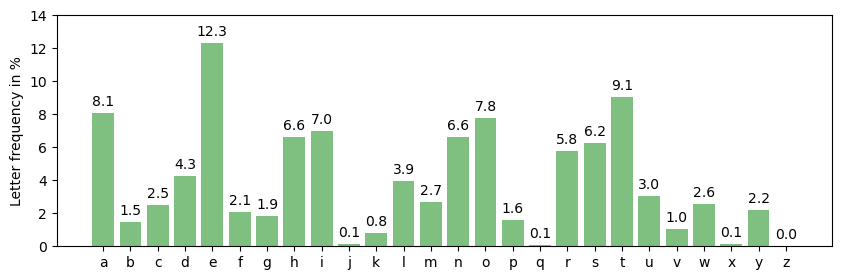

In [50]:
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(letters, frequencies, width=0.8, color='g', alpha=0.5)
plt.ylabel('Letter frequency in %')
plt.ylim(0, 14)
ax.bar_label(bars, fmt='%.1f', padding=3);

In [63]:
alphas = "abcdefghijklmnopqrstuvwxyz "
most_common_letter = counter.most_common()[0][0]
most_common_i = alphas.find(most_common_letter)

print(f'The most common letter is \'{most_common_letter}\' with index {most_common_i}')

The most common letter is 'e' with index 4


### Method 1: We know the Key Size

Supposed the key is $15$ characters long

1. look at every $15^{\text{th}}$ character of the cipertext, starting with the first
2. Let $\alpha$ be the most common character appearing in this portion of the cipertext
3. Most likely this character corresponds to the most common plaintexyt character $e$
4. Guess the first character of the key is $\alpha - e = \alpha - 4$
5. Repeat for all other positions

In [52]:
def restore_vigenere_key(key_length, ciphertext):
    restored_key = ""
    # repeat for all key positions
    for k in range(1, key_length + 1):
    
        # get every 15th character of the cipertext
        c_k = Counter([ciphertext[i+k-1:i+k] for i in range(0, len(ciphertext), key_length)])
    
        # let 'a' be the most common character-index appearing in this portion of the cipertext
        a = alphas.find(c_k.most_common()[0][0])
    
        # guess the character at position 'k' of the key
        restored_key += alphas[a - most_common_i]
        
    return restored_key

In [53]:
url = 'https://www.gutenberg.org/cache/epub/4300/pg4300.txt' # The Project Gutenberg eBook of Ulysses
text = [t for t in requests.get(url).text.lower() if t in string.ascii_lowercase] # we want only [a-z]
text = "".join(text)

In [54]:
key = 'myverysecretkey'
cipher = VigenereCipher(key)
ciphertext = cipher.enc(text)

Restore the key using a cipher text of length 1000 chars:

In [55]:
restore_vigenere_key(15, ciphertext[:2000])

'mzvermsecretzth'

Restore the key using a cipher text of length `len(ciphertext) = 1197183` chars:

In [56]:
restore_vigenere_key(15, ciphertext)

'mzverzsecretkez'

What size of the cipher text is required to restore the key?

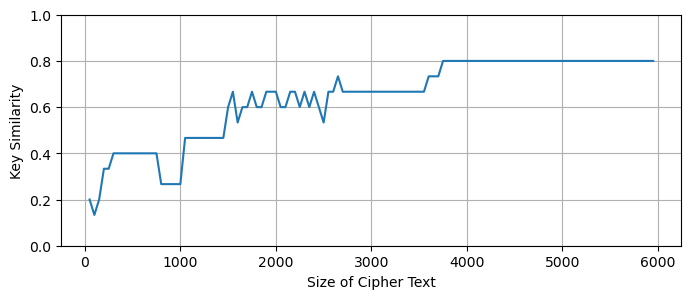

In [57]:
import difflib
ciphertext_size = []
similarity = []
for s in range(50, 6000, 50):
    restored_key = restore_vigenere_key(15, ciphertext[:s])
    ciphertext_size.append(s)
    similarity.append(difflib.SequenceMatcher(a=key, b=restored_key).ratio())

plt.subplots(figsize=(8, 3))
plt.ylim(0, 1)
plt.grid()
plt.ylabel('Key Similarity')
plt.xlabel('Size of Cipher Text')
plt.plot(ciphertext_size, similarity);

### Method 2: The Key Size is Unknown

Here we use the variant of the Vigenèr cipher.

We first determine the key length and second determine each byte of the key.

In [230]:
url = 'https://www.gutenberg.org/cache/epub/4300/pg4300.txt' # The Project Gutenberg eBook of Ulysses
text = [t for t in requests.get(url).text if ord(t) in list(range(32,127))] # we want only printable ASCII characters
text = "".join(text)

In [231]:
key = [hex(ord(c)) for c in 'a very secret key']
cipher = VariantVigenereCipher(key)
ciphertext = cipher.enc(text)

#### Determine the Key Length

1. Let $p_i$ for $0 \leq i \leq 255$ the frequency of byte $i$ in plaintext with $p_i = 0$ for $i < 32$ and $i > 126$ (these are non printable characters)

2. If the key length is $N$, then every $N^{th}$ character of thr plaintext is encryptes using the same "shift".

3. If we take every $N^{th}$ character and calculate the freuqencies, we should get all $p_i$ in **permuted order**.

4. If we take every $M^{th}$ character (with $M$ not a multiple of $N$) and calculate the freuqencies, we should get something close to **unifom** (heuristically speaking).

5. Calculate the **L2 norm** of each distribution. The L2 norm of a uniform probability distribution is always smaller of a non-uniform distribution, hence the largest L2 norm allows to identify $N$.

<br><br>

For a probability distribution $p = [p_1, \ldots, p_n]$ with $\sum p_i = 1$, the L2 norm is 

$$\|p\|_2 = \sqrt{p_1^2 + \ldots + p_n^2}$$

Now consider a uniform distribution $u = [\frac{1}{n}, \ldots, \frac{1}{n}]$, then we have 

$$\|u\|_2 = \sqrt{n \cdot \frac{1}{n^2}} = \frac{1}{\sqrt{n}}$$

By the **Cauchy-Schwarz Inequality**, we have:

$$\Big(\sum{}a_i b_i\Big)^2 \leq \sum{}a_i^2 \cdot \sum{}b_i^2$$

Let $a_i = p_i$ and $b_i = \frac{1}{n}$. Then

$$
\begin{align}
\Big(\sum{p_i \frac{1}{n}}\Big)^2 &\leq \sum{}p_i^2 \cdot \sum{}\frac{1}{n^2} \\[5pt]
\Big(\frac{1}{n}\Big)^2 &\leq \sum{}p_i^2 \cdot \frac{1}{n} \\[5pt]
\frac{1}{n} &\leq \sum{}p_i^2 \\[5pt]
\sqrt{\frac{1}{n}} &\leq \sqrt{\sum{}p_i^2} \\[10pt]
\|u\|_2 &\leq \|p\|_2
\end{align}
$$

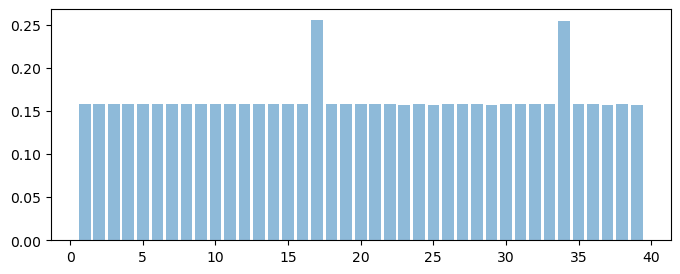

In [260]:
import math
L2norms = []
for N in range(1, 40):
    counter = Counter([c for c in ciphertext[::N]])
    L2norm = math.sqrt(sum([(counter[c] / sum(counter.values())) ** 2 for c in counter]))
    L2norms.append((L2norm, N))

plt.subplots(figsize=(8, 3))
plt.bar([n for _, n in L2norms], [p for p, _ in L2norms], alpha=0.5);

In [261]:
key_length = sorted(L2norms, reverse=True)[0][1]
print(f'Key length: {len(key)}')
print(f'Determined key length: {key_length}')

Key length: 17
Determined key length: 17


#### Determine Each Byte of the Key